# Part 2

## تئوری ۹

A_{ij}=\begin{cases}p,z_{i}=z_{j}\\ q,z_{i}\neq z_{j}\end{cases}


## تئوری ۱۰

خیر-
درایه‌های روی قطر اصلی باید همگی یک باشند ولی برابر با p هستند.
همچنین درایه‌های متقارن باید با هم برابر باشند درصورتی که در توصیف احتمالاتی بالا ممکن است متفاوت باشند.

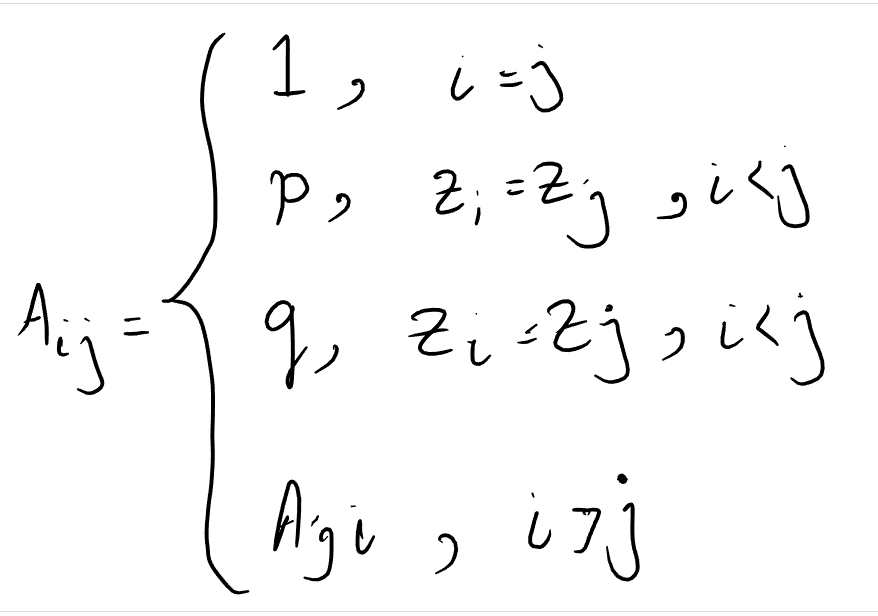

## Q2
پرسش شبیه سازی ۲. از ماتریسی که در پرسش تئوری ۱۰ توصیف کردید، ۱۰ نمونه بسازید.

In [9]:
import numpy as np
import random
from scipy.stats import bernoulli
import networkx
# import networkx

n = 15
k = 3
p = 0.6
q = 0.1
Q = np.arange(k*k, dtype=float).reshape(k,k)
for i in range(k):
    for j in range(k):
        Q[i][j] = p if i==j else q

def create_uniform_z(n,k):
    poeple_at_table = [0 for i in range(k)]
    z = list()
    for i in range(n):
        v = random.randint(1,k)
        while(poeple_at_table[v-1]==n/k): v = random.randint(1, k)
        poeple_at_table[v-1] += 1
        z.append(v)
    return np.array(z)


def create_A():
    z = create_uniform_z(n, k)
    A = np.arange(n*n).reshape(n,n)
    for i in range(n):
        for j in range(n):
            value = int(bernoulli(Q[z[i]-1][z[j]-1]).rvs(1))
            if(i==j): value = 1
            elif(i>j): value = A[j][i]
            A[i][j] = value
    return A,z

for i in range(10):
    A,_ = create_A()
    print(A)

[[1 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 1 0 1 0 0 1 0 0 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 1 1 0 0 0 1 0 0 0]
 [0 1 0 1 1 0 0 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 1 0 1 0]
 [0 1 0 1 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 1 1 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 1 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 1]
 [0 0 0 1 0 1 1 1 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 0 0 1 0 0 1 0 0]
 [1 1 1 0 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1]]
[[1 1 1 0 0 0 1 1 0 0 1 0 0 0 0]
 [1 1 1 1 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 1 1 0 0 1 0 0 0 0 0 0]
 [1 1 1 1 0 0 1 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 1 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 1 0 0 1 1 0]
 [1 0 0 0 0 0 0 0 0 0 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 0 0 1 1 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]]
[[1 0 0 

## Q3

hello


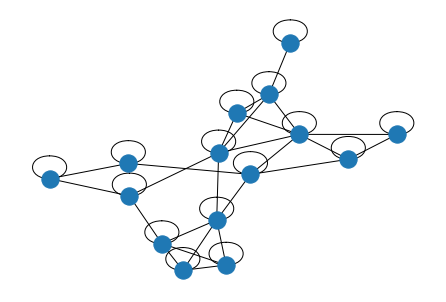

In [12]:
import numpy as np
import random
from scipy.stats import bernoulli
import networkx
import networkx as nx

n = 15
k = 3
p = 0.6
q = 0.1
Q = np.arange(k*k, dtype=float).reshape(k,k)
for i in range(k):
    for j in range(k):
        Q[i][j] = p if i==j else q

def create_uniform_z(n,k):
    poeple_at_table = [0 for i in range(k)]
    z = list()
    for i in range(n):
        v = random.randint(1,k)
        while(poeple_at_table[v-1]==n/k): v = random.randint(1, k)
        poeple_at_table[v-1] += 1
        z.append(v)
    return np.array(z)


def create_A():
    z = create_uniform_z(n, k)
    A = np.arange(n*n).reshape(n,n)
    for i in range(n):
        for j in range(n):
            value = int(bernoulli(Q[z[i]-1][z[j]-1]).rvs(1))
            if(i==j): value = 1
            elif(i>j): value = A[j][i]
            A[i][j] = value
    return A,z

A,z = create_A()
G = nx.Graph()
for i in range(n):
    G.add_node(i, table=z[i])

for i in range(n):
    for j in range(n):
        if  i == j:
            A[i][j] == 0
        if A[i][j] == 1:
            G.add_edge(i, j)
print("hello")
# nx.draw_networkx_labels(G, pos)
nx.draw(G)


## Q4

In [14]:
def hamming_distance(a:np.array,b:np.array):
    return int(np.linalg.norm(a - b,ord=0))
a= np.array([2,2,1,2,2,1])
b= np.array([1,1,2,1,2,2])
print(hamming_distance(a, b))


5


## Q5

In [17]:
def permutation(lst):
    if len(lst) == 0:
        return []
 
    if len(lst) == 1:
        return [lst]
 
    l = [] # empty list that will store current permutation
 
    for i in range(len(lst)):
       m = lst[i]
 
       remLst = lst[:i] + lst[i+1:]
       for p in permutation(remLst):
           l.append([m] + p)
    return l


def hamming_distance(a:np.array,b:np.array):
    return int(np.linalg.norm(a - b,ord=0))
    
def get_class_of_vector(a:np.array, n:int):
    nlist = list(range(1,n+1))
    aClass = list()
    for p in permutation(nlist):
        aCopy = a.copy()
        for i,v in enumerate(aCopy):
            aCopy[i] = p[v-1]
        aClass.append(aCopy)
    return aClass

def min_hamming_distance(a:np.array, b:np.array, k:int): # k table counts
    aClass = get_class_of_vector(a, k)  
    return min(list([ hamming_distance(x,b) for x in aClass]))
        
print(min_hamming_distance(a, b, 2))


1


## تئوری ۱۱

$
\dfrac{N^{2}-N}{2}
$

## تئوری ۱۲

$
L\left( z\right) =\prod ^{n}_{i,j=1,i <j}A_{ij}
$

## تئوری ۱۳


$
\sum ^{n}_{i,j=1,i <j}\log \left( A_{ij}\right)
$

## Q6

In [20]:
def Liklyhood(A,z):
    p = 0
    for i in range(n):
        for j in range(n):
            # print(z[i], z[j])
            p += - np.log(Q[z[i]-1][z[j]-1] if A[i][j]==1 else (1-Q[z[i]-1][z[j]-1]))
    return p

A,z = create_A()
Liklyhood(A,z)

89.40292643753747

## Q7

In [49]:

def get_z0(n,k):
    result = list()
    for i in range(int(k)):
        for j in range(int(n/k)):
            result.append(i+1)
    # print("z0 is:", result)
    return np.array(result)

# Q7
def z_fit(A, realz, z0=get_z0(n, k),):
    dlist = list()
    # z0 = get_z0(n, k)
    if len(z0) != n:
        # print("FAAALSE!")
        pass
    T = 5
    bestL = 1e9
    for t in range(T):
        initial_L = Liklyhood(A, z0)
        bestL = initial_L
        MaxDelta = 0
        best = (0,0)
        for i in range(n):
            for j in range(n):
                temp = z0[i]
                z0[i] = z0[j]
                z0[j] = temp
                delta = initial_L - Liklyhood(A, z0)
                if delta > MaxDelta:
                    MaxDelta = delta
                    best = (i,j)
                    bestL = initial_L - delta
                temp = z0[i]
                z0[i] = z0[j]
                z0[j] = temp
        if best[0]==0:
            print("not completed")
            break
        temp = z0[best[0]]
        z0[best[0]] = z0[best[1]]
        z0[best[1]] = temp
        dlist.append(min_hamming_distance(z0, realz, k))
    return bestL, z0, dlist

A, z0 = create_A()
bestL, z, dlist = z_fit(A, z0)
dlist

not completed


[5, 3, 2, 0]

## Q8

In [79]:
A,z = create_A()
realL = Liklyhood(A,z)
ZList = list()
LList = list()
print("best L:", realL)
for i in range(10):
    startZ = create_uniform_z(n,k)
    L,z0,_ = z_fit(A, z, startZ)
    ZList.append(z0)
    LList.append(L)
    print("L=",L, "\tZ=",z0)

best L: 95.41923602464254
not completed
L= 111.03537413730884 	Z= [3 1 2 2 3 3 3 3 1 1 2 1 2 1 2]
not completed
L= 95.41923602464254 	Z= [2 1 2 3 3 1 3 1 1 1 2 2 2 3 3]
not completed
L= 95.41923602464254 	Z= [1 3 1 2 2 3 2 3 3 3 1 1 1 2 2]
not completed
L= 105.82999476642006 	Z= [3 1 3 2 2 1 2 1 1 2 3 1 3 2 3]
not completed
L= 137.06227099175257 	Z= [2 3 3 2 3 2 2 1 3 2 3 1 1 1 1]
L= 105.82999476642007 	Z= [1 3 1 2 2 3 1 3 3 3 1 1 2 2 2]
not completed
L= 100.6246153955313 	Z= [1 1 2 3 3 2 3 2 1 1 2 1 2 3 3]
not completed
L= 105.82999476642003 	Z= [1 1 1 3 2 3 3 2 2 2 1 1 3 2 3]
L= 100.62461539553128 	Z= [2 2 2 1 1 3 1 3 3 3 2 3 2 1 1]
not completed
L= 100.6246153955313 	Z= [2 2 3 1 1 3 1 3 2 2 3 2 3 1 1]


## Q9

In [80]:
for LItem, ZItem in zip(LList, ZList):
    if LItem == realL:
        print("found a perfect Z", ZItem)
        print("min hamming distance is", min_hamming_distance(ZItem, z, k))

found a perfect Z [2 1 2 3 3 1 3 1 1 1 2 2 2 3 3]
min hamming distance is 0
found a perfect Z [1 3 1 2 2 3 2 3 3 3 1 1 1 2 2]
min hamming distance is 0


## Q10

In [1]:
## همانظور که در بالا یافتیم تعدادی هستند که فاصله‌شان صفر شده است

## Q11

In [ ]:
## برای اینکار کد بخش بالا را دوبار دیگر اجرا می‌کنیم